# Starter example for pyicon using xarray

Some specific commands for Jupyter:

In [1]:
# Jupyter Notebook with widget matplotlib plots
#%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

Load necessary modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyicon as pyic
import xarray as xr
import cartopy.crs as ccrs

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


## Load the data

Define the name of the simulation, its grid, the path to the data and paths to the grid:

In [16]:
run = 'sfx0080'
gname = 'r2b4_oce_r0004'
lev = 'L40'

path_data     = f'~/pyicon/example_data/{run}/'
path_grid     = f'/work/mh0033/m300602/icon/grids/{gname}/'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'
fpath_tgrid   = f'{path_grid}{gname}_tgrid.nc'

# choose resolution for interplation between 0.10, 0.30, 0.10, 0.02 
# (or have a look in f'{path_grid}/ckdtree/rectgrids/' for possible options)
fpath_ckdtree = f'{path_grid}/ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.nc'

In [21]:
ds = xr.open_dataset(f'{path_data}/{run}_oce_P1M_3d_20100101.nc')

In [22]:
ds

<xarray.Dataset>
Dimensions:                    (time: 120, ncells: 15105, vertices: 3,
                                ncells_2: 23207, vertices_2: 4, depth: 40,
                                depth_2: 41)
Coordinates:
  * time                       (time) datetime64[ns] 2010-01-31T23:00:00 ... ...
    clon                       (ncells) float32 ...
    clat                       (ncells) float32 ...
    elon                       (ncells_2) float32 ...
    elat                       (ncells_2) float32 ...
  * depth                      (depth) float64 6.0 17.0 ... 5.17e+03 5.72e+03
  * depth_2                    (depth_2) float64 0.0 12.0 ... 5.42e+03 6.02e+03
Dimensions without coordinates: ncells, vertices, ncells_2, vertices_2
Data variables: (12/21)
    clon_bnds                  (ncells, vertices) float32 ...
    clat_bnds                  (ncells, vertices) float32 ...
    elon_bnds                  (ncells_2, vertices_2) float32 ...
    elat_bnds                  (ncells_2, vertices_2) float32 ...
    opottemptend               (time, depth, ncells) float32 ...
    osalttend                  (time, depth, ncells) float32 ...
    ...                         ...
    rhopot                     (time, depth, ncells) float32 ...
    mass_flux                  (time, depth, ncells_2) float32 ...
    heat_content_liquid_water  (time, depth, ncells) float32 ...
    swrab                      (time, depth, ncells) float32 ...
    rsdoabsorb                 (time, depth, ncells) float32 ...
    tke                        (time, depth_2, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 2.0.5 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  36
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    uuidOfHGrid:          5bd948e8-ac1a-11ea-a6b1-d317264fdca9
    source:               git@gitlab.dkrz.de:icon/icon-les.git@ba6c828aecbf9c...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    history:              Sat Aug 20 03:48:16 2022: cdo -r -O -z zip -shiftti...
    references:           see MPIM/DWD publications
    comment:              Susanne Fuchs (m300879) on l20440 (Linux 4.18.0-305...
    CDO:                  Climate Data Operators version 2.0.5 (https://mpime...

In [23]:
ds.time

<xarray.DataArray 'time' (time: 120)>
array(['2010-01-31T23:00:00.000000000', '2010-02-28T23:00:00.000000000',
       '2010-03-31T23:00:00.000000000', '2010-04-30T23:00:00.000000000',
       '2010-05-31T23:00:00.000000000', '2010-06-30T23:00:00.000000000',
       '2010-07-31T23:00:00.000000000', '2010-08-31T23:00:00.000000000',
       '2010-09-30T23:00:00.000000000', '2010-10-31T23:00:00.000000000',
       '2010-11-30T23:00:00.000000000', '2010-12-31T23:00:00.000000000',
       '2011-01-31T23:00:00.000000000', '2011-02-28T23:00:00.000000000',
       '2011-03-31T23:00:00.000000000', '2011-04-30T23:00:00.000000000',
       '2011-05-31T23:00:00.000000000', '2011-06-30T23:00:00.000000000',
       '2011-07-31T23:00:00.000000000', '2011-08-31T23:00:00.000000000',
       '2011-09-30T23:00:00.000000000', '2011-10-31T23:00:00.000000000',
       '2011-11-30T23:00:00.000000000', '2011-12-31T23:00:00.000000000',
       '2012-01-31T23:00:00.000000000', '2012-02-29T23:00:00.000000000',
       '2012-03-31T23:00:00.000000000', '2012-04-30T23:00:00.000000000',
       '2012-05-31T23:00:00.000000000', '2012-06-30T23:00:00.000000000',
       '2012-07-31T23:00:00.000000000', '2012-08-31T23:00:00.000000000',
       '2012-09-30T23:00:00.000000000', '2012-10-31T23:00:00.000000000',
       '2012-11-30T23:00:00.000000000', '2012-12-31T23:00:00.000000000',
       '2013-01-31T23:00:00.000000000', '2013-02-28T23:00:00.000000000',
       '2013-03-31T23:00:00.000000000', '2013-04-30T23:00:00.000000000',
       '2013-05-31T23:00:00.000000000', '2013-06-30T23:00:00.000000000',
       '2013-07-31T23:00:00.000000000', '2013-08-31T23:00:00.000000000',
       '2013-09-30T23:00:00.000000000', '2013-10-31T23:00:00.000000000',
       '2013-11-30T23:00:00.000000000', '2013-12-31T23:00:00.000000000',
       '2014-01-31T23:00:00.000000000', '2014-02-28T23:00:00.000000000',
       '2014-03-31T23:00:00.000000000', '2014-04-30T23:00:00.000000000',
       '2014-05-31T23:00:00.000000000', '2014-06-30T23:00:00.000000000',
       '2014-07-31T23:00:00.000000000', '2014-08-31T23:00:00.000000000',
       '2014-09-30T23:00:00.000000000', '2014-10-31T23:00:00.000000000',
       '2014-11-30T23:00:00.000000000', '2014-12-31T23:00:00.000000000',
       '2015-01-31T23:00:00.000000000', '2015-02-28T23:00:00.000000000',
       '2015-03-31T23:00:00.000000000', '2015-04-30T23:00:00.000000000',
       '2015-05-31T23:00:00.000000000', '2015-06-30T23:00:00.000000000',
       '2015-07-31T23:00:00.000000000', '2015-08-31T23:00:00.000000000',
       '2015-09-30T23:00:00.000000000', '2015-10-31T23:00:00.000000000',
       '2015-11-30T23:00:00.000000000', '2015-12-31T23:00:00.000000000',
       '2016-01-31T23:00:00.000000000', '2016-02-29T23:00:00.000000000',
       '2016-03-31T23:00:00.000000000', '2016-04-30T23:00:00.000000000',
       '2016-05-31T23:00:00.000000000', '2016-06-30T23:00:00.000000000',
       '2016-07-31T23:00:00.000000000', '2016-08-31T23:00:00.000000000',
       '2016-09-30T23:00:00.000000000', '2016-10-31T23:00:00.000000000',
       '2016-11-30T23:00:00.000000000', '2016-12-31T23:00:00.000000000',
       '2017-01-31T23:00:00.000000000', '2017-02-28T23:00:00.000000000',
       '2017-03-31T23:00:00.000000000', '2017-04-30T23:00:00.000000000',
       '2017-05-31T23:00:00.000000000', '2017-06-30T23:00:00.000000000',
       '2017-07-31T23:00:00.000000000', '2017-08-31T23:00:00.000000000',
       '2017-09-30T23:00:00.000000000', '2017-10-31T23:00:00.000000000',
       '2017-11-30T23:00:00.000000000', '2017-12-31T23:00:00.000000000',
       '2018-01-31T23:00:00.000000000', '2018-02-28T23:00:00.000000000',
       '2018-03-31T23:00:00.000000000', '2018-04-30T23:00:00.000000000',
       '2018-05-31T23:00:00.000000000', '2018-06-30T23:00:00.000000000',
       '2018-07-31T23:00:00.000000000', '2018-08-31T23:00:00.000000000',
       '2018-09-30T23:00:00.000000000', '2018-10-31T23:00:00.000000000',
       '2018-11-30T23:00:00.000000000', '2018-12-31T23:00:00.000000000',
       '2019-01-31T2

In [24]:
ds.depth

<xarray.DataArray 'depth' (depth: 40)>
array([   6. ,   17. ,   27. ,   37. ,   47. ,   57. ,   68.5,   82.5,  100. ,
        122.5,  150. ,  182.5,  220. ,  262.5,  310. ,  362.5,  420. ,  485. ,
        560. ,  645. ,  740. ,  845. ,  960. , 1085. , 1220. , 1365. , 1525. ,
       1700. , 1885. , 2080. , 2290. , 2525. , 2785. , 3070. , 3395. , 3770. ,
       4195. , 4670. , 5170. , 5720. ])
Coordinates:
  * depth    (depth) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
Attributes:
    standard_name:  depth
    long_name:      depth_below_sea
    units:          m
    positive:       down
    axis:           Z

## Select data

In [25]:
to = ds['to'].isel(time=0, depth=0)
to_3d = ds['to'].isel(time=0)

## Derive some means and show shape etc. (optional)

Mask land values (assuming 0 data values to be land):

In [26]:
to = to.where(to!=0.)

We can calculate the mean value:

In [27]:
to.mean()

<xarray.DataArray 'to' ()>
array(21.226412, dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-01-31T23:00:00
    depth    float64 6.0

In [28]:
to.time

<xarray.DataArray 'time' ()>
array('2010-01-31T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-01-31T23:00:00
    depth    float64 6.0
Attributes:
    standard_name:  time
    axis:           T

or get information about the size of the data:

In [29]:
to.shape

(15105,)

In [30]:
to_3d.shape

(40, 15105)

## Interpolate data to a regular grid

Use the pyicon interp_to_rectgrid_xr function. The path to the regular grid ckdtree file (fpath_ckdtree) needs to be specified. It decides which regular grid is taken but only those grids can be chosen which were calculated and saved externally.

In [31]:
toi = pyic.interp_to_rectgrid_xr(to, fpath_ckdtree)

## Plotting with xarray

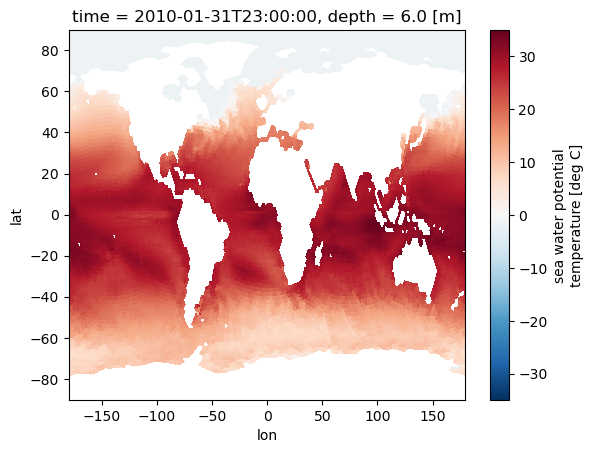

In [32]:
fig = plt.figure()
toi.plot()

## Plotting with pyicon

/home/m/m300602/miniconda3/envs/pyicon_py39_cartopy19/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/m/m300602/miniconda3/envs/pyicon_py39_cartopy19/lib/python3.9/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/m/m300602/miniconda3/envs/pyicon_py39_cartopy19/lib/python3.9/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

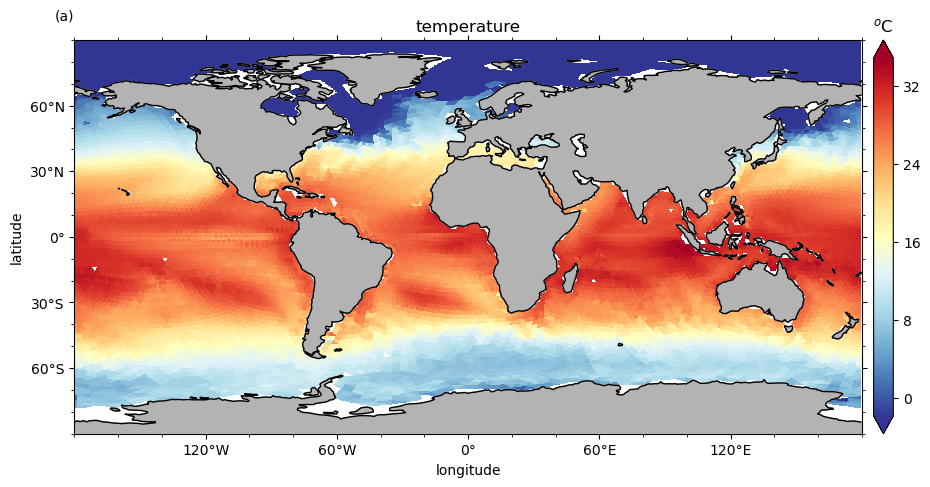

In [33]:
projection = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, projection=projection)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(toi.lon, toi.lat, toi, ax=ax, cax=cax, clim='auto')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('temperature')
cax.set_title('$^o$C')

pyic.plot_settings(ax, template='global')

## Plotting a region on the original triangular grid

Speficy region and derive triangulation object:

In [37]:
lon_reg = [-60,-20]
lat_reg = [0, 20]
ds_tg = xr.open_dataset(fpath_tgrid)
ind_reg, Tri = pyic.triangulation(ds_tg, lon_reg, lat_reg)

Cut data to region:

In [38]:
to_reg = to.isel(ncells=ind_reg)

Plotting:

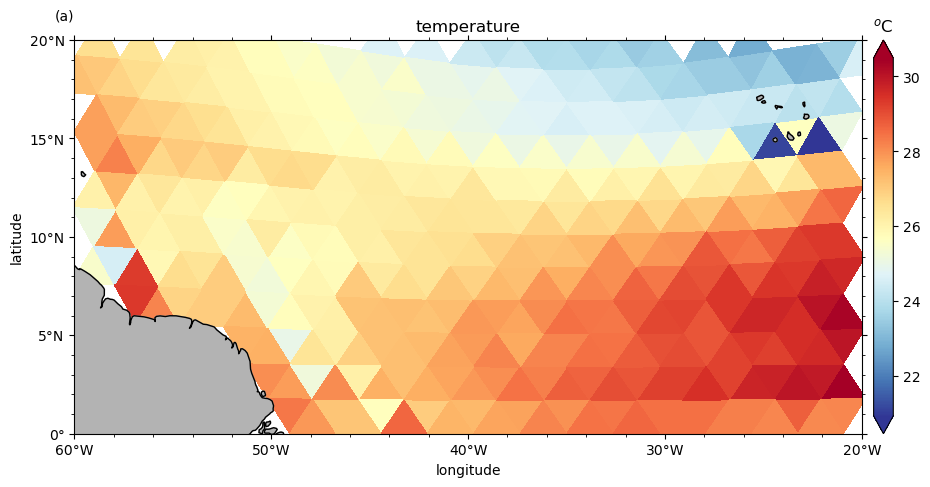

In [39]:
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, projection=projection)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(Tri, to_reg, ax=ax, cax=cax)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('temperature')
cax.set_title('$^o$C')

pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)